In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../../dataset/First Experiment/Austrian/Austrian(SKG_VIE).xlsx")
df = pd.DataFrame(data)

In [4]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,16:10:00,08:15:00,316,7,1,2,1,222,1040.85
1,16:10:00,20:25:00,316,7,1,2,0,222,1070.18
2,16:10:00,20:25:00,316,7,1,2,0,222,1071.18
3,16:10:00,09:25:00,316,7,1,2,1,222,1080.85
4,16:10:00,22:35:00,316,7,1,2,0,222,1116.18


In [5]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
Class 		-	 0.0
price 		-	 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
departure_time      1009 non-null object
arrival_time        1009 non-null object
days_before         1009 non-null int64
day_of_week         1009 non-null int64
num_of_luggage      1009 non-null int64
num_of_stops        1009 non-null int64
overnight_flight    1009 non-null int64
Class               1009 non-null int64
price               1009 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 71.1+ KB


In [7]:
df.shape

(1009, 9)

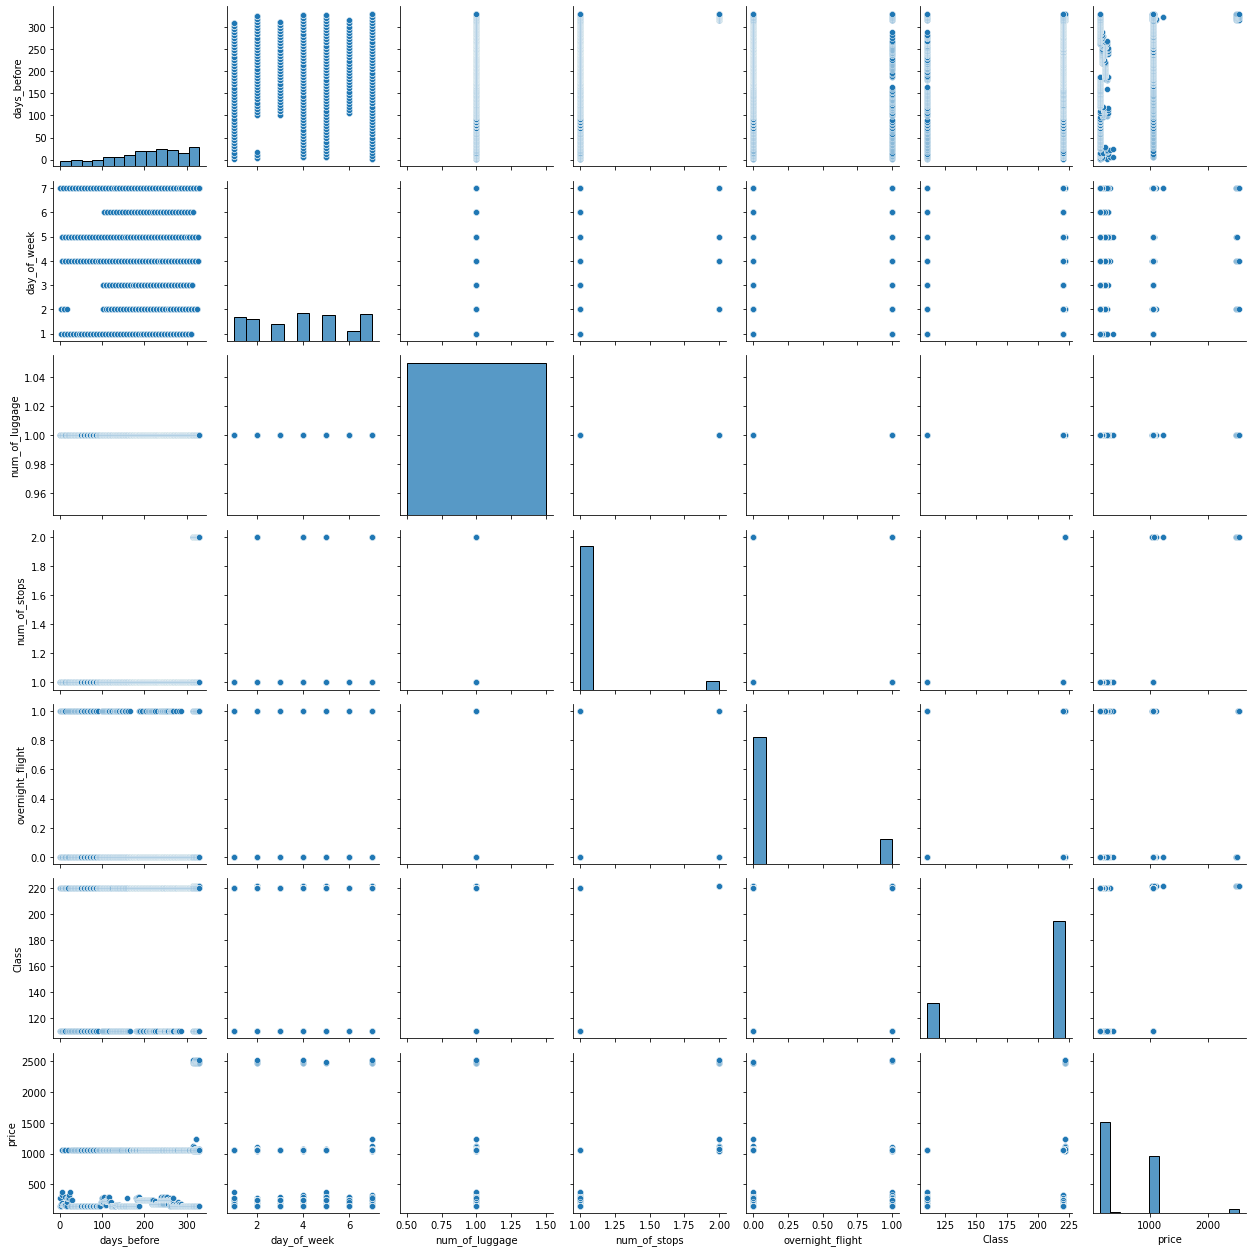

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [10]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [11]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,1900-01-01 16:10:00,1900-01-01 08:15:00,316,7,1,2,1,222,1040.85
1,1900-01-01 16:10:00,1900-01-01 20:25:00,316,7,1,2,0,222,1070.18
2,1900-01-01 16:10:00,1900-01-01 20:25:00,316,7,1,2,0,222,1071.18
3,1900-01-01 16:10:00,1900-01-01 09:25:00,316,7,1,2,1,222,1080.85
4,1900-01-01 16:10:00,1900-01-01 22:35:00,316,7,1,2,0,222,1116.18


In [12]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [13]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [14]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price,departuretime,arrivaltime
0,1900-01-01 16:10:00,1900-01-01 08:15:00,316,7,1,2,1,222,1040.85,-2208930600000000000,-2208959100000000000
1,1900-01-01 16:10:00,1900-01-01 20:25:00,316,7,1,2,0,222,1070.18,-2208930600000000000,-2208915300000000000
2,1900-01-01 16:10:00,1900-01-01 20:25:00,316,7,1,2,0,222,1071.18,-2208930600000000000,-2208915300000000000
3,1900-01-01 16:10:00,1900-01-01 09:25:00,316,7,1,2,1,222,1080.85,-2208930600000000000,-2208954900000000000
4,1900-01-01 16:10:00,1900-01-01 22:35:00,316,7,1,2,0,222,1116.18,-2208930600000000000,-2208907500000000000


In [15]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'Class', 'price',
       'departuretime', 'arrivaltime'],
      dtype='object')

In [16]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','Class','price']]

In [17]:
del df['departuretime']

In [18]:
del df['arrivaltime']

In [19]:
#df = df.apply(np.int64)

In [20]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,7,316,1,2,1,222,1040.85
1,7,316,1,2,0,222,1070.18
2,7,316,1,2,0,222,1071.18
3,7,316,1,2,1,222,1080.85
4,7,316,1,2,0,222,1116.18


In [21]:
df.to_csv('skg_vie_proc.csv')

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [1]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.4205532897635361


In [4]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.4879916317324108


In [5]:
bag_sc = r2_score(y_test, y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.49171474246933633


In [6]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.49171535203782224


In [7]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.4315842584497628


In [8]:
rf_sc = r2_score(y_test, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.49146021415553887


In [9]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [34]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: -0.39132793694785284


In [10]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.15228683778921537


In [11]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [36]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [37]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [38]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [39]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [40]:
model = vgg11()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            41088     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                38450     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [41]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
26/26 [==============================] - 4s 13ms/step - loss: 480639.3125 - val_loss: 369563.5000
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 244909.5781 - val_loss: 333150.8438
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 244379.3281 - val_loss: 438413.3750
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 245428.7188 - val_loss: 298895.3750
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 244194.8750 - val_loss: 287339.5625
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 241525.8906 - val_loss: 261430.3438
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 249353.1406 - val_loss: 223729.2344
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 240872.9688 - val_loss: 268090.0938
Epoch 9/200
26/26 [==============================] - 0s 3ms/step - loss: 238047.1250 - val_loss: 220786.7656
Epoch 10/200
26/26

26/26 [==============================] - 0s 5ms/step - loss: 172592.7500 - val_loss: 464674.6875
Epoch 150/200
26/26 [==============================] - 0s 4ms/step - loss: 169260.3750 - val_loss: 679854.8125
Epoch 151/200
26/26 [==============================] - 0s 4ms/step - loss: 169202.6094 - val_loss: 403061.9375
Epoch 152/200
26/26 [==============================] - 0s 5ms/step - loss: 166727.0781 - val_loss: 368738.3438
Epoch 153/200
26/26 [==============================] - 0s 4ms/step - loss: 164408.3594 - val_loss: 748033.5625
Epoch 154/200
26/26 [==============================] - 0s 4ms/step - loss: 164877.3906 - val_loss: 647358.5000
Epoch 155/200
26/26 [==============================] - 0s 4ms/step - loss: 168276.0781 - val_loss: 597923.2500
Epoch 156/200
26/26 [==============================] - 0s 4ms/step - loss: 167907.6094 - val_loss: 669270.7500
Epoch 157/200
26/26 [==============================] - 0s 4ms/step - loss: 168756.3438 - val_loss: 951273.3750
Epoch 158/200
2

In [42]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.1631919004312078


In [12]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [43]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model = vgg13()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
26/26 [==============================] - 1s 11ms/step - loss: 517628.3438 - val_loss: 242080.8906
Epoch 2/200
26/26 [==============================] - 0s 5ms/step - loss: 252275.8281 - val_loss: 270647.1875
Epoch 3/200
26/26 [==============================] - 0s 5ms/step - loss: 244109.5000 - val_loss: 223122.4219
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 246088.3281 - val_loss: 239201.9844
Epoch 5/200
26/26 [==============================] - 0s 5ms/step - loss: 242113.8594 - val_loss: 270017.9062
Epoch 6/200
26/26 [==============================] - 0s 5ms/step - loss: 240767.2812 - val_loss: 361817.9688
Epoch 7/200
26/26 [==============================] - 0s 5ms/step - loss: 242244.4844 - val_loss: 266338.4688
Epoch 8/200
26/26 [==============================] - 0s 5ms/step - loss: 242632.9844 - val_loss: 260636.7500
Epoch 9/200
26/26 [==============================] - 0s 5ms/step - loss: 244770.0781 - val_loss: 238077.9375
Epoch 10/200
26/26

26/26 [==============================] - 0s 5ms/step - loss: 166509.3594 - val_loss: 527619.6250
Epoch 150/200
26/26 [==============================] - 0s 4ms/step - loss: 165855.1562 - val_loss: 565439.6250
Epoch 151/200
26/26 [==============================] - 0s 4ms/step - loss: 164816.1562 - val_loss: 639426.4375
Epoch 152/200
26/26 [==============================] - 0s 4ms/step - loss: 164678.0938 - val_loss: 315456.0938
Epoch 153/200
26/26 [==============================] - 0s 4ms/step - loss: 177937.2812 - val_loss: 884651.5000
Epoch 154/200
26/26 [==============================] - 0s 4ms/step - loss: 166840.1719 - val_loss: 570159.1250
Epoch 155/200
26/26 [==============================] - 0s 4ms/step - loss: 164828.3750 - val_loss: 810399.7500
Epoch 156/200
26/26 [==============================] - 0s 4ms/step - loss: 164676.7188 - val_loss: 906406.1250
Epoch 157/200
26/26 [==============================] - 0s 5ms/step - loss: 167158.8750 - val_loss: 938322.8750
Epoch 158/200
2

In [46]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: -0.21134368463788689


In [13]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [47]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
26/26 [==============================] - 0s 8ms/step - loss: 442448.5625 - val_loss: 491616.1875
Epoch 2/200
26/26 [==============================] - 0s 5ms/step - loss: 245092.2031 - val_loss: 300082.1250
Epoch 3/200
26/26 [==============================] - 0s 5ms/step - loss: 243005.6406 - val_loss: 344600.7500
Epoch 4/200
26/26 [==============================] - 0s 5ms/step - loss: 242426.4844 - val_loss: 283776.8438
Epoch 5/200
26/26 [==============================] - 0s 5ms/step - loss: 243108.1094 - val_loss: 287267.5625
Epoch 6/200
26/26 [==============================] - 0s 5ms/step - loss: 242506.7500 - val_loss: 305515.9062
Epoch 7/200
26/26 [==============================] - 0s 5ms/step - loss: 245168.5156 - val_loss: 236322.2812
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 241538.2969 - val_loss: 222431.2031
Epoch 9/200
26/26 [==============================] - 0s 4ms/step - loss: 239243.3594 - val_loss: 327660.0000
Epoch 10/200
26/26 

26/26 [==============================] - 0s 5ms/step - loss: 168383.9062 - val_loss: 460758.4688
Epoch 150/200
26/26 [==============================] - 0s 5ms/step - loss: 169449.0000 - val_loss: 829777.2500
Epoch 151/200
26/26 [==============================] - 0s 5ms/step - loss: 167888.8594 - val_loss: 658533.8750
Epoch 152/200
26/26 [==============================] - 0s 5ms/step - loss: 174506.6094 - val_loss: 541784.2500
Epoch 153/200
26/26 [==============================] - 0s 5ms/step - loss: 168947.6875 - val_loss: 545747.5000
Epoch 154/200
26/26 [==============================] - 0s 5ms/step - loss: 166400.1562 - val_loss: 1010303.4375
Epoch 155/200
26/26 [==============================] - 0s 4ms/step - loss: 166782.4531 - val_loss: 517513.7812
Epoch 156/200
26/26 [==============================] - 0s 5ms/step - loss: 171654.3281 - val_loss: 1348696.2500
Epoch 157/200
26/26 [==============================] - 0s 4ms/step - loss: 189742.2969 - val_loss: 521771.8750
Epoch 158/200

In [14]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [49]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                154850    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [50]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
26/26 [==============================] - 1s 13ms/step - loss: 311396.2188 - val_loss: 273203.4375
Epoch 2/200
26/26 [==============================] - 0s 5ms/step - loss: 249767.3906 - val_loss: 219341.6562
Epoch 3/200
26/26 [==============================] - 0s 5ms/step - loss: 251262.0781 - val_loss: 214402.6875
Epoch 4/200
26/26 [==============================] - 0s 5ms/step - loss: 249569.4531 - val_loss: 272769.6250
Epoch 5/200
26/26 [==============================] - 0s 5ms/step - loss: 251192.9062 - val_loss: 203809.3438
Epoch 6/200
26/26 [==============================] - 0s 5ms/step - loss: 246813.2031 - val_loss: 214168.4375
Epoch 7/200
26/26 [==============================] - 0s 5ms/step - loss: 244730.4062 - val_loss: 320604.0000
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 241151.6406 - val_loss: 212981.6094
Epoch 9/200
26/26 [==============================] - 0s 5ms/step - loss: 246842.6094 - val_loss: 247180.2812
Epoch 10/200
26/26

26/26 [==============================] - 0s 5ms/step - loss: 163814.3125 - val_loss: 551126.3125
Epoch 150/200
26/26 [==============================] - 0s 5ms/step - loss: 161524.9531 - val_loss: 340797.4688
Epoch 151/200
26/26 [==============================] - 0s 5ms/step - loss: 166976.4219 - val_loss: 333899.3125
Epoch 152/200
26/26 [==============================] - 0s 5ms/step - loss: 161154.6250 - val_loss: 607786.8750
Epoch 153/200
26/26 [==============================] - 0s 5ms/step - loss: 165066.3438 - val_loss: 802264.8125
Epoch 154/200
26/26 [==============================] - 0s 5ms/step - loss: 157692.0000 - val_loss: 303793.2188
Epoch 155/200
26/26 [==============================] - 0s 5ms/step - loss: 172368.8125 - val_loss: 332256.2812
Epoch 156/200
26/26 [==============================] - 0s 5ms/step - loss: 163176.3438 - val_loss: 411153.4688
Epoch 157/200
26/26 [==============================] - 0s 5ms/step - loss: 168225.1094 - val_loss: 855265.0000
Epoch 158/200
2

In [15]:
res34_sc = r2_score(y, y_pred)
storeResults('ResNet34',res34_sc)

# MobileNetv1

In [51]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [52]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
26/26 [==============================] - 1s 11ms/step - loss: 558224.9375 - val_loss: 231546.0938
Epoch 2/200
26/26 [==============================] - 0s 5ms/step - loss: 286488.1875 - val_loss: 281883.4375
Epoch 3/200
26/26 [==============================] - 0s 5ms/step - loss: 248231.4688 - val_loss: 322732.4062
Epoch 4/200
26/26 [==============================] - 0s 5ms/step - loss: 242439.9062 - val_loss: 296093.4062
Epoch 5/200
26/26 [==============================] - 0s 5ms/step - loss: 241798.6250 - val_loss: 263585.8438
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 241709.8750 - val_loss: 267894.3750
Epoch 7/200
26/26 [==============================] - 0s 5ms/step - loss: 239844.7031 - val_loss: 326148.9688
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 240036.8438 - val_loss: 222350.5312
Epoch 9/200
26/26 [==============================] - 0s 5ms/step - loss: 242768.3750 - val_loss: 252691.9219
Epoch 10/200
26/26

26/26 [==============================] - 0s 4ms/step - loss: 173384.5312 - val_loss: 958289.8750
Epoch 150/200
26/26 [==============================] - 0s 4ms/step - loss: 173633.4531 - val_loss: 511570.7812
Epoch 151/200
26/26 [==============================] - 0s 4ms/step - loss: 169213.5938 - val_loss: 639109.6250
Epoch 152/200
26/26 [==============================] - 0s 5ms/step - loss: 171320.4219 - val_loss: 692027.2500
Epoch 153/200
26/26 [==============================] - 0s 5ms/step - loss: 168101.6719 - val_loss: 975367.0000
Epoch 154/200
26/26 [==============================] - 0s 5ms/step - loss: 171971.4688 - val_loss: 531033.6250
Epoch 155/200
26/26 [==============================] - 0s 5ms/step - loss: 174727.8438 - val_loss: 853005.4375
Epoch 156/200
26/26 [==============================] - 0s 5ms/step - loss: 168045.2812 - val_loss: 477420.1562
Epoch 157/200
26/26 [==============================] - 0s 5ms/step - loss: 170997.4062 - val_loss: 760676.1250
Epoch 158/200
2

In [16]:
mob1_sc = r2_score(y, y_pred)
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [53]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [54]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
26/26 [==============================] - 1s 10ms/step - loss: 291809.5000 - val_loss: 325796.3125
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 244853.8125 - val_loss: 512997.0312
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 250525.4844 - val_loss: 391682.7812
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 258424.7812 - val_loss: 285378.7500
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 253350.3125 - val_loss: 320796.6250
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 239701.9219 - val_loss: 746577.6875
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 291196.8125 - val_loss: 224889.3438
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 250231.2969 - val_loss: 245045.8438
Epoch 9/200
26/26 [==============================] - 0s 4ms/step - loss: 238680.4688 - val_loss: 273664.0000
Epoch 10/200
26/26

26/26 [==============================] - 0s 5ms/step - loss: 165575.3906 - val_loss: 365041.6562
Epoch 150/200
26/26 [==============================] - 0s 5ms/step - loss: 164138.6719 - val_loss: 328334.7812
Epoch 151/200
26/26 [==============================] - 0s 5ms/step - loss: 162005.4688 - val_loss: 536529.1875
Epoch 152/200
26/26 [==============================] - 0s 5ms/step - loss: 160961.1719 - val_loss: 389355.7188
Epoch 153/200
26/26 [==============================] - 0s 5ms/step - loss: 160695.6094 - val_loss: 642348.8750
Epoch 154/200
26/26 [==============================] - 0s 5ms/step - loss: 162161.5156 - val_loss: 374866.7188
Epoch 155/200
26/26 [==============================] - 0s 5ms/step - loss: 161664.4375 - val_loss: 386398.4688
Epoch 156/200
26/26 [==============================] - 0s 5ms/step - loss: 159677.9219 - val_loss: 613326.8750
Epoch 157/200
26/26 [==============================] - 0s 5ms/step - loss: 163703.3125 - val_loss: 412613.1875
Epoch 158/200
2

In [17]:
mob2_sc = r2_score(y, y_pred)
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [18]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [19]:
result

,ML Model,R2-Score
0,AdaBoost,0.420
1,Bagging,0.488
2,Gradient Boosting,0.492
3,Decision Tree,0.492
4,Random Forest,0.431
5,Extra Tree,0.491
6,SVR,0.391
7,MLP,0.152
8,VGG11,0.163
9,VGG13,0.211


# Graph

In [20]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

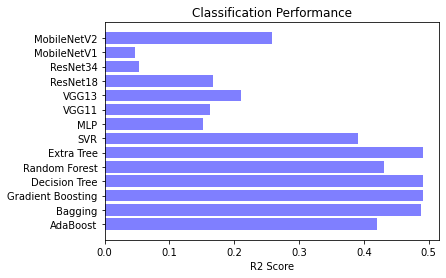

In [21]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()